In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import StamenTonerTilesAccess as STT
import requests
import StringIO
from PIL import Image
from scipy import stats
import json
from shapely.geometry import shape, Point
from itertools import izip
import time

In [ ]:
# import time

# t0 = time.time()

# crime_df = df[(df.CrimeCodeNo<500) | (df.CrimeCodeNo==800)].dropna().reset_index().drop(['index'],axis=1)
# neilist = []
# for i in xrange(1000):#len(crime_df)
#     url = 'http://api.phillyhoods.net/v1/locations/' + str(crime_df.iloc[i].lat) + ',' + str(crime_df.iloc[i].lon)
#     try:
#         resp = requests.get(url)
#     except requests.exceptions.RequestException as e:    # This is the correct syntax
#         print e
#         sys.exit(1)
#     jsondata = StringIO.StringIO(resp.content)
#     data = json.load(jsondata)
#     neilist.append(str(data['results']['features'][0]['properties']['name']))
    
# t1 = time.time()

# total = t1-t0
# print total

In [ ]:
            
# t1 = time.time()

# total1 = t1-t0
# print 'nested for loops takes ' + str(total1) + ' seconds'

# Rather complex for a list comprehension
# t2 = time.time()
# nei_list2 = [next(str(feature['properties']['mapname']) for feature in js['features']
#                                        if shape(feature['geometry']).contains(point))
#             for point in (Point(lon, lat) for lon, lat in izip(lon_list, lat_list))]
# t3 = time.time()

# total2 = t3-t2
# print 'list comprehension takes ' + str(total2) + ' seconds'

In [ ]:
EM 6-9
LM 9-12
EA 12-3
LA 3-6
EV 6-9
NT 9-12
LN 12-3
DN 3-6

In [1]:
import urllib

file_location, headers = urllib.urlretrieve("http://goo.gl/w8nHnz")
with open(file_location, 'r') as f:
    i = 0
    for line in f:
        print line,
        i+=1
        if i==10:
            break

FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 
ELE17451 GRO73461 DAI22896 SNA99873 FRO18919 DAI50921 SNA80192 GRO75578 
ELE17451 ELE59935 FRO18919 ELE23393 SNA80192 SNA85662 SNA91554 DAI22177 
ELE17451 SNA69641 FRO18919 SNA90258 ELE28573 ELE11375 DAI14125 FRO78087 
ELE17451 GRO73461 DAI22896 SNA80192 SNA85662 SNA90258 DAI46755 FRO81176 ELE66810 DAI49199 DAI91535 GRO94758 ELE94711 DAI22177 
ELE17451 SNA69641 DAI91535 GRO94758 GRO99222 FRO76833 FRO81176 SNA80192 DAI54690 ELE37798 GRO56989 


In [2]:
def data_pass(file_location, support, pass_nbr, candidate_dct):
    with open(file_location, 'r') as f:
        for line in f:
            item_lst = line.split()     
            candidate_dct = update_candidates(item_lst, candidate_dct, pass_nbr)
        
    candidate_dct = clear_items(candidate_dct, support, pass_nbr)
    
    return candidate_dct

In [3]:
from itertools import combinations

def update_candidates(item_lst, candidate_dct, pass_nbr):
    if pass_nbr==1:
        for item in item_lst:
            candidate_dct[(item,)]+=1
    else:
        frequent_items_set = set()
        for item_tuple in combinations(sorted(item_lst), pass_nbr-1):    
            if item_tuple in candidate_dct:
                frequent_items_set.update(item_tuple)
                    
        for item_set in combinations(sorted(frequent_items_set), pass_nbr):
            candidate_dct[item_set]+=1
        
    return candidate_dct

In [4]:
def clear_items(candidate_dct, support, pass_nbr):
    for item_tuple, cnt in candidate_dct.items():
        if cnt<support or len(item_tuple)<pass_nbr:
            del candidate_dct[item_tuple]
    return candidate_dct

In [5]:
import time
from collections import defaultdict

def main(file_location, support, itemset_size):
    candidate_dct = defaultdict(lambda: 0)
    for i in range(itemset_size):
        now = time.time()
        candidate_dct = data_pass(file_location, support, pass_nbr=i+1, candidate_dct=candidate_dct)
        print "pass number %i took %f and found %i candidates" % (i+1, time.time()-now, len(candidate_dct))
    return candidate_dct

In [6]:
support = 100
itemset_size = 3
itemsets_dct = main(file_location, support, itemset_size)

pass number 1 took 0.164727 and found 647 candidates
pass number 2 took 1.013474 and found 1334 candidates
pass number 3 took 2.187170 and found 233 candidates


In [7]:
i=0
for itemset, frequency in itemsets_dct.iteritems():
    print itemset, frequency
    i+=1
    if i==10:
        break

('FRO40251', 'GRO85051', 'SNA80324') 471
('DAI85309', 'ELE17451', 'ELE92920') 137
('DAI75645', 'FRO40251', 'SNA55762') 131
('DAI75645', 'ELE74009', 'FRO40251') 139
('DAI31081', 'FRO40251', 'GRO85051') 102
('DAI62779', 'GRO21487', 'GRO73461') 173
('DAI62779', 'GRO38814', 'GRO73461') 154
('DAI62779', 'ELE17451', 'SNA96271') 111
('ELE17451', 'FRO40251', 'GRO73461') 159
('DAI75645', 'SNA55762', 'SNA80324') 117


In [3]:
df = pd.read_pickle('crime_data')

In [4]:
crime_df = df.dropna().reset_index().drop(['index'],axis=1)


In [5]:
dt = [a + ' ' + b for a,b in izip(crime_df.Date.values.tolist(),crime_df.Time.values.tolist())]
crime_df['DateTime'] = pd.to_datetime(dt)
crime_df['Day'] = [x.weekday_name for x in crime_df['DateTime']]
crime_df['TimeOfDay'] = ['EM' if 6<=time.hour<9 else 'LM' if 9<=time.hour<12
                         else 'EA' if 12<=time.hour<15 else 'LA' if 15<=time.hour<18
                         else 'EV' if 18<=time.hour<21 else 'NT' if 21<=time.hour<=23
                         else 'LN' if 0<=time.hour<3  else 'DN' if 3<=time.hour<6 else 'NA'
                         for time in crime_df.DateTime]
crime_df['TimeOfYear'] = ['SP' if 3<=time.month<=5 else 'SM' if 6<=time.month<=8
                          else 'FA' if 9<=time.month<=11 else 'WN' for time in crime_df.DateTime]

In [6]:
np.random.seed(0)
indices = np.random.permutation(10)

In [7]:
indices

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

In [11]:
indices[:-3]

array([2, 8, 4, 9, 1, 6, 7])

In [12]:
indices[-3:]

array([3, 0, 5])

In [13]:

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [20]:
len(y)

150

In [21]:
crime_df

CrimeCodeNo                   CrimeCodeText        Date      Time  \
0               1500               Weapon Violations  2009-07-19  01:09:00   
1               2600              All Other Offenses  2009-06-25  00:14:00   
2                600                          Thefts  2015-04-25  12:50:00   
3                800                  Other Assaults  2009-02-10  14:33:00   
4                600                          Thefts  2015-10-06  18:18:00   
5                600                          Thefts  2015-10-09  00:49:00   
6                600                          Thefts  2015-11-30  08:39:00   
7               2400              Disorderly Conduct  2015-04-11  17:38:00   
8                600                          Thefts  2015-12-10  12:29:00   
9                600                          Thefts  2009-01-11  12:30:00   
10               900                           Arson  2009-05-21  09:46:00   
11               600                          Thefts  2015-05-05  03:14:00   
12               600                          Thefts  2015-12-08  14:42:00   
13               600                          Thefts  2015-10-13  19:48:00   
14               800                  Other Assaults  2015-08-23  01:58:00   
15               900                           Arson  2009-04-15  14:09:00   
16              1100                           Fraud  2015-03-10  23:05:00   
17               600                          Thefts  2015-02-24  16:05:00   
18               600              Theft from Vehicle  2015-06-03  07:02:00   
19               600                          Thefts  2015-02-26  15:20:00   
20               300              Robbery No Firearm  2015-11-13  16:51:00   
21               800                  Other Assaults  2015-10-29  18:53:00   
22               600              Theft from Vehicle  2015-11-10  09:59:00   
23               600                          Thefts  2009-02-15  12:36:00   
24               600              Theft from Vehicle  2015-03-07  08:47:00   
25               600                          Thefts  2015-07-06  10:16:00   
26               600              Theft from Vehicle  2015-04-24  10:23:00   
27               600              Theft from Vehicle  2015-08-07  03:55:00   
28               300                 Robbery Firearm  2015-11-05  11:44:00   
29               600                          Thefts  2015-04-06  16:38:00   
...              ...                             ...         ...       ...   
2090420          700  Recovered Stolen Motor Vehicle  2016-03-01  01:56:00   
2090421          700  Recovered Stolen Motor Vehicle  2016-02-29  06:35:00   
2090422          700  Recovered Stolen Motor Vehicle  2016-02-29  09:11:00   
2090423          700             Motor Vehicle Theft  2016-02-29  11:42:00   
2090424          700  Recovered Stolen Motor Vehicle  2016-02-29  16:31:00   
2090425          700  Recovered Stolen Motor Vehicle  2016-02-29  18:05:00   
2090426          700  Recovered Stolen Motor Vehicle  2016-03-01  00:08:00   
2090427          700  Recovered Stolen Motor Vehicle  2016-02-29  11:27:00   
2090428          700  Recovered Stolen Motor Vehicle  2016-02-29  21:13:00   
2090429          700             Motor Vehicle Theft  2016-02-29  20:07:00   
2090430          600              Theft from Vehicle  2016-02-29  11:08:00   
2090431          800                  Other Assaults  2016-02-29  21:14:00   
2090432         1100                           Fraud  2016-02-29  21:51:00   
2090433          800                  Other Assaults  2016-02-29  18:52:00   
2090434         1100                           Fraud  2016-02-29  16:09:00   
2090435         1400     Vandalism/Criminal Mischief  2016-02-29  17:10:00   
2090436         2600              All Other Offenses  2016-02-29  11:55:00   
2090437         1100                           Fraud  2016-02-29  19:53:00   
2090438         2600              All Other Offenses  2016-02-29  12:04:00   
2090439          600           

(array([ 20.,   4.,   3.,   2.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([  5.26202492e-04,   1.97565118e+00,   3.95077615e+00,
          5.92590112e+00,   7.90102609e+00,   9.87615107e+00,
          1.18512760e+01,   1.38264010e+01,   1.58015260e+01,
          1.77766510e+01,   1.97517759e+01]),
 <a list of 10 Patch objects>)

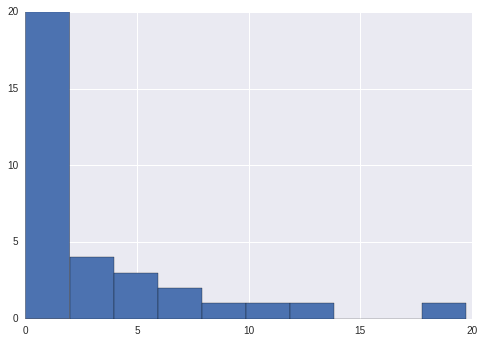

In [42]:
plt.hist((100*crime_df.groupby('CrimeCodeText')['Date'].count()/len(crime_df)).tolist())

In [43]:
(100*crime_df.groupby('CrimeCodeText')['Date'].count()/len(crime_df))

CrimeCodeText
Aggravated Assault Firearm                  1.238729
Aggravated Assault No Firearm               3.074458
All Other Offenses                         19.751776
Arson                                       0.253964
Burglary Non-Residential                    1.057189
Burglary Residential                        4.289507
DRIVING UNDER THE INFLUENCE                 2.396039
Disorderly Conduct                          1.865484
Embezzlement                                0.207324
Forgery and Counterfeiting                  0.222488
Fraud                                       5.000215
Gambling Violations                         0.042240
Homicide - Criminal                         0.152503
Homicide - Gross Negligence                 0.000526
Homicide - Justifiable                      0.001961
Liquor Law Violations                       0.255447
Motor Vehicle Theft                         2.126910
Narcotic / Drug Law Violations              6.242771
Offenses Against Family and Chil

In [44]:
crime_df = crime_df[crime_df.CrimeCodeText != 'All Other Offenses'']

SyntaxError: EOL while scanning string literal (<ipython-input-44-8b569e213c60>, line 1)

In [ ]:
X_alldata = X.T.to_dict
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
M = v.fit_transform(X_alldata.values())

In [2]:


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [3]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [ ]:
from sklearn.grid_search import RandomizedSearchCV

reg_strengths = [0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
scoring_methods = ['f1','precision','roc_auc']
param_grid = dict(C=reg_strengths)
grid = RandomizedSearchCV(logreg,param_grid,cv=5,scoring = 'f1',n_iter=3)
grid.fit(X,y)

# First, I would like to test the hypothesis that there are more crimes in the spring and summer (when it's warmer) than in the fall and winter i.e.

## Null Hypothesis H0: There is no significant difference between the proportion of crimes that take place in spring and summer as compared to in the fall and winter
## Alternative Hypothesis H1: There are more crimes in the spring and summer than in the fall and winter

## I first do this with aggravated crime

In [ ]:
crime_df = df[(df.CrimeCodeNo<500) | (df.CrimeCodeNo==800)].drop(['lat','lon','CrimeCodeNo','CrimeCodeText'],axis=1)

crime_df = crime_df.reset_index().drop('index',axis=1)

# We use the function PropHypTestSeason (defined below) to test if my hypothesis is true

PropHypTestSeason(crime_df)

In [ ]:
def PropHypTestSeason(crime_df):
    
    # First, I remove the 2016 data to ensure that the data is not skewed i.e. four data comes from a set with
    # equal number of falls, winters, springs and summers
    
    crime_df = crime_df[[int(x[0:4])<2016 for x in crime_df.Date.values]].reset_index()
    
    # I then define SprSum to be March-August and FaWin to be September-February
    
    crime_df['Season'] = ['SprSum' if 3<=int(date[5:7])<=8 else 'FaWin' for date in crime_df.Date.values]
    
    # I then compute the proportion of crimes committed in each season
    
    grouped = crime_df.groupby('Season')
    prop =grouped.Date.count()/(len(crime_df))
    
    spsump = prop.SprSum*100
    fawinp = prop.FaWin*100
    num_samples = len(crime_df)

    print "Total number of crimes committed between Jan 2006 and Dec 2015 is " + str(num_samples)
    print "Proportion of crimes committed in the Spring and Summer is %.2f %%" %spsump
    print "Proportion of crimes committed in the Fall and Winter is %.2f %%" %fawinp
    
    #Is the crime significantly higher in the Spring and Summer than in the Fall and Winter?
    
    print "Null Hypothesis H0: There is no difference between the number of crimes in SprSum and FaWin i.e. proportion of crimes committed = 50% for both"
    print "Alternative Hypothesis H1: There are more crimes committed in SprSum than in FaWin"
    
    # Since the data follows a bernoulli distribution (1 for SprSum, 0 for Fa Win), we can easily compute
    # the sample standard deviation to be sqrt(prop.FaWin*prop.SprSum), which we can (biased-ly) assume
    # is equal to the population std. To get the std of the distribution of sample means, we divide this 
    # by sqrt(num_samples)
    
    dsm_std = np.sqrt(prop.FaWin*prop.SprSum/num_samples)
    
    # Assume our null hypothesis is true. Then we expect the mean of the bernoulli random variable to be .5
    # We can get the z-score to compute how many standard deviations away our sample mean is from the population
    # mean (which is equal to the mean of the distribution of sample means)
    
    Z = abs(prop.SprSum-.5)/dsm_std
    
    # From the z-score, we can compute the p-value
    p = stats.norm.sf(Z)
    print "p-value = " + str(p)    

# As it turns out, when using a proportion hypothesis test z-test (since our sample size is large), the p-value is extremely small. This means that the probability of observing our sample when assuming that our null hypothesis is true is extremely small. Therefore, we can reject the null hypothesis in favor of the alternative hypothesis, with a very small chance of getting a Type 1 error

In [ ]:
    grouped = crime_df.groupby(['Season','Date'])
    ct = grouped.Date.count()
    fig = plt.figure(figsize=(12,6))
    ot_plot = plt.hist(ct.Others.values,bins=20,label = 'Rest of year')
    w_plot = plt.hist(ct.Winter.values,bins=20,label = 'Winter')
    plt.xlabel('Number of crimes in a day',fontsize = 25)
    plt.ylabel('Frequency',fontsize = 25)
    plt.legend()

In [ ]:

                        
#     print "Null Hypothesis H0: There is no difference between the number of crimes per day in winter and the rest of the year"
#     print "Alternative Hypothesis H1: There are fewer crimes committed in winter than during the rest of the year"   
   

In [ ]:
# zillow id X1-ZWz1fc8aeuonwr_7ew1d

In [ ]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]